In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2024-08-10 14:10:18.590724: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-10 14:10:18.592112: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-10 14:10:18.598624: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-10 14:10:18.619487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 14:10:18.652639: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
teams = pd.read_csv("teams.csv")  

In [3]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [4]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


This teams.csv contains some columns that you don't want so we create a new dataframe of teams.csv which contains only the required column

In [5]:
new_teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [6]:
new_teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


# How to predict??
We want to predict the medals that a country will get on the basis of the number of previous medals the country got(prev_medals) and the number of athletes (athletes) and to do so we check the co-relation(gives the measurement of how strong the attributes are related to each other) to actually determine if we can use those specified columns.

In [7]:
new_teams.corr(numeric_only="true")['medals']  #basically gives correlation to numeric columns

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

From the above correlation between medals and other columns, we can see that the relation between prev_medals and athletes are strong with the medals so we can actually use them to predict the medals column

Text(0, 0.5, 'medals')

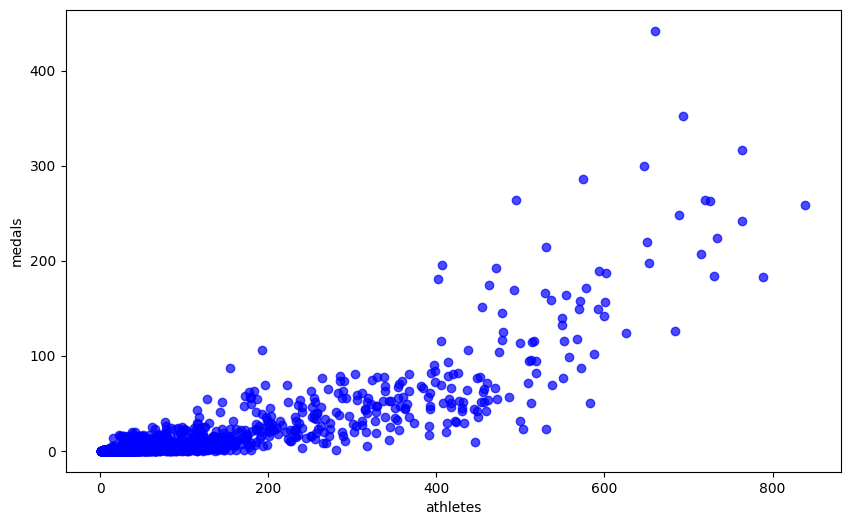

In [8]:
#Data Exploration using matplotlib
plt.figure(figsize=(10, 6))
# Scatter plot
plt.scatter(new_teams['athletes'], new_teams['medals'],  color='blue', alpha=0.7)
plt.xlabel('athletes')
plt.ylabel('medals')

Text(0, 0.5, 'medals')

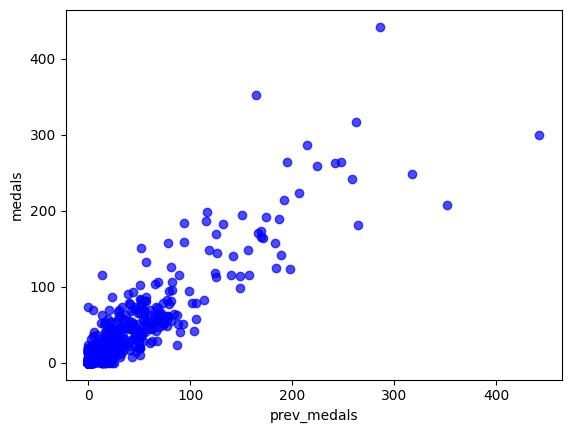

In [9]:
plt.scatter(new_teams['prev_medals'], new_teams['medals'],  color='blue', alpha=0.7)
plt.xlabel('prev_medals')
plt.ylabel('medals')

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'athletes'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'prev_medals'}>],
       [<Axes: title={'center': 'medals'}>, <Axes: >]], dtype=object)

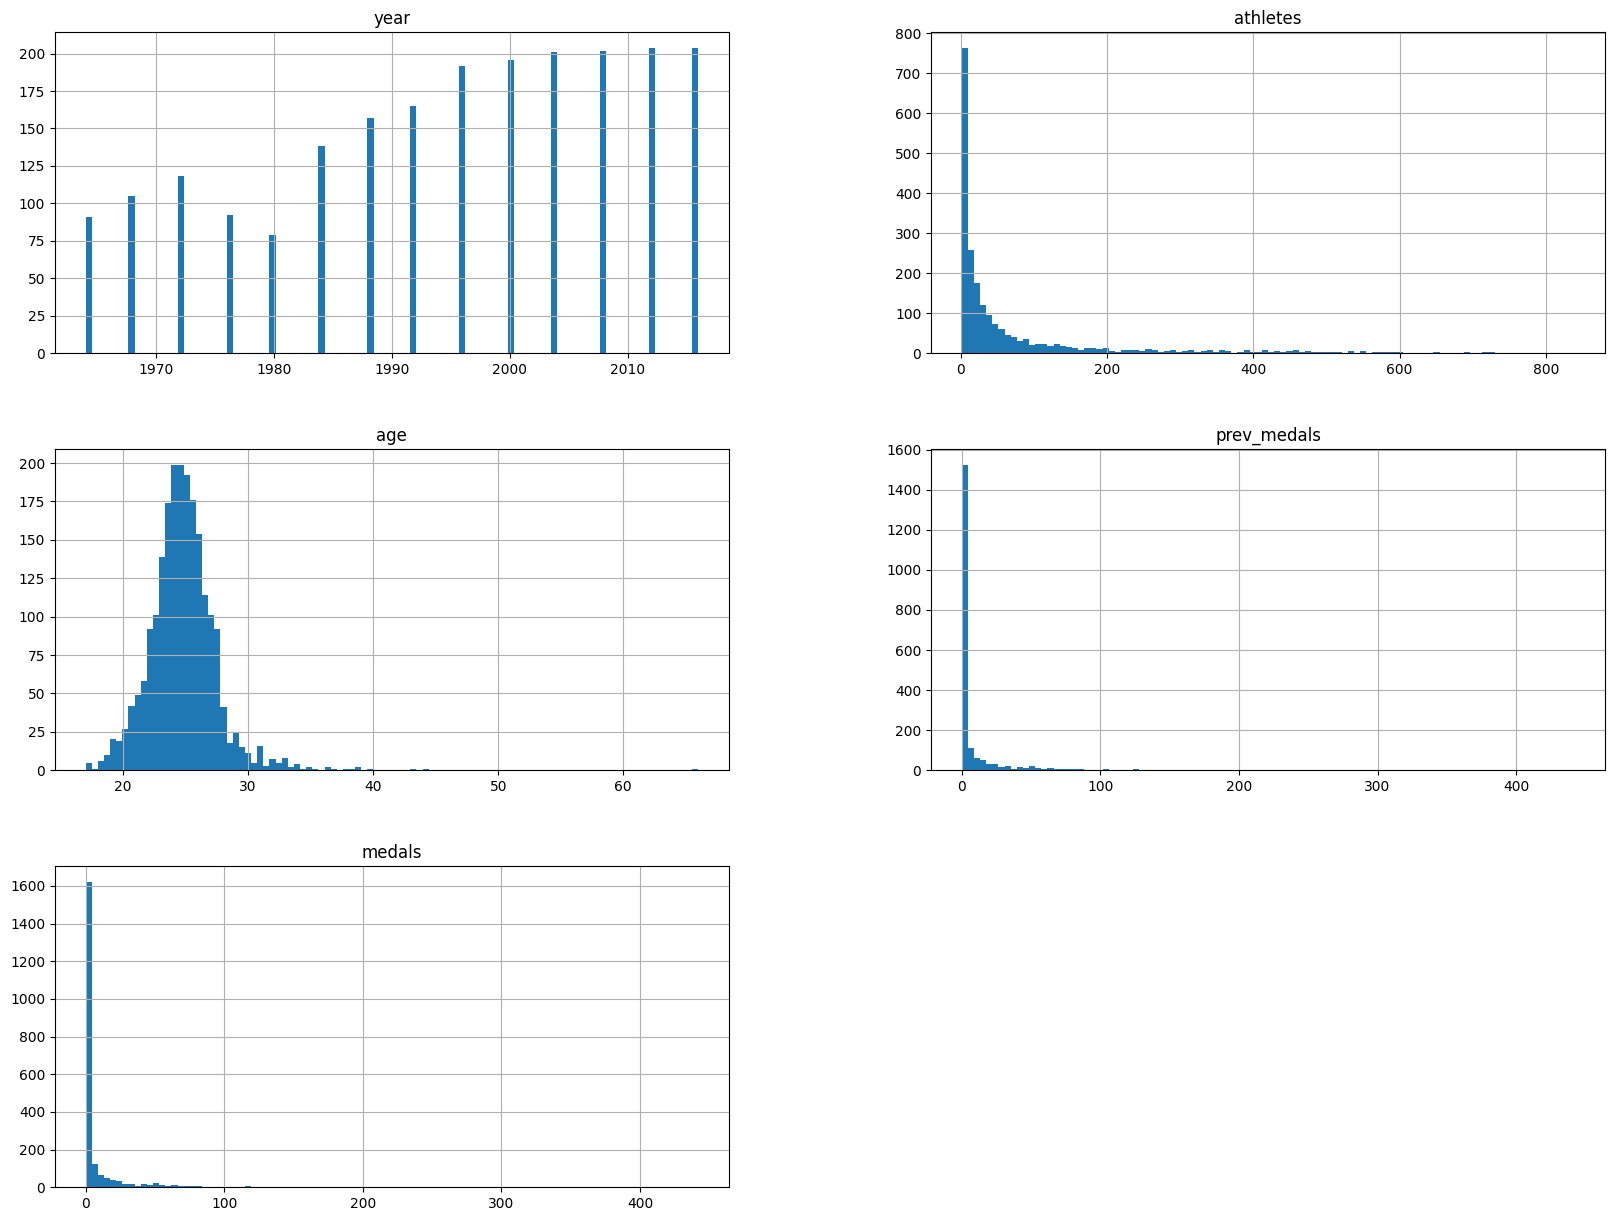

In [10]:
new_teams.hist(bins=100,figsize=(20,15))

In [11]:
#checking if there are missing values
new_teams[new_teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [12]:
new_teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [13]:
new_teams = new_teams.dropna()

In [14]:
#splitting the data. Here we split the data ahead from year 2012 to train and remaining to test. This is because in the real world we wont have future data. We only have the past data.
train = new_teams[new_teams['year'] < 2012].copy()
test = new_teams[new_teams['year'] >= 2012].copy()


In [15]:
train.shape

(1609, 7)

In [16]:
test.shape

(405, 7)

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [18]:
predictors = ["athletes", "prev_medals"]

In [19]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [20]:
predictions = reg.predict(test[predictors])

In [21]:
test["predictions"] = predictions

In [22]:
test.loc[test["predictions"] < 0, "predictions"] = 0 #setting negative prediction to 0

In [23]:
test["predictions"] = test["predictions"].round()

In [24]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [25]:
teams.describe()["medals"]

count    2144.000000
mean       10.556437
std        33.028143
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       442.000000
Name: medals, dtype: float64

In [26]:
test["predictions"] = predictions
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.210121
2054,USA,United States,2016,719,26.4,248.0,264,235.568076


In [27]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,6.921667
908,IND,India,2016,130,26.1,6.0,2,11.683176


In [28]:
errors = (test["medals"] - predictions).abs()

<Axes: ylabel='Frequency'>

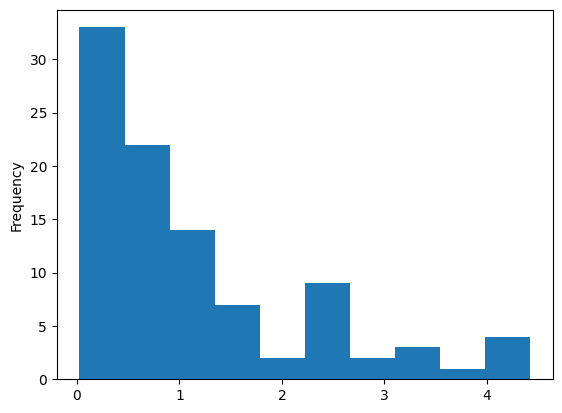

In [29]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team 
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio.plot.hist()